In [12]:
import http.client
import pandas as pd
%matplotlib inline
import pandas as pd
%matplotlib inline

In [13]:
conn = http.client.HTTPSConnection("apigw1.bot.or.th")

headers = {
    'x-ibm-client-id': "Client ID",
    'accept': "application/json"
    }

conn.request("GET", "/bot/public/Stat-ExchangeRate/v2/DAILY_AVG_EXG_RATE/?start_period=2020-09-01&end_period=2020-09-15&currency=CHF", headers=headers)

#conn.request("GET", "/bot/public/Stat-ExchangeRate/v2/MONTHLY_AVG_EXG_RATE/?start_period=2020-01&end_period=2020-09&currency=LAK", headers=headers)

In [14]:
res = conn.getresponse()
data = res.read()

In [15]:
print(data.decode("utf-8"))

{"result":{"timestamp":"2020-09-18 13:50:16","api":"Daily Weighted-average Interbank Exchange Rate - THB / USD","data":{"data_header":{"report_name_eng":"Rates of Exchange of Commercial Banks in Bangkok Metropolis (2002-present)","report_name_th":"อัตราแลกเปลี่ยนเฉลี่ยของธนาคารพาณิชย์ในกรุงเทพมหานคร (2545-ปัจจุบัน)","report_uoq_name_eng":"(Unit: Baht / 1 Unit of Foreign Currency)","report_uoq_name_th":"(หน่วย: บาท ต่อ 1 หน่วยเงินตราต่างประเทศ)","report_source_of_data":[{"source_of_data_eng":"Bank of Thailand","source_of_data_th":"ธนาคารแห่งประเทศไทย"}],"report_remark":[{"report_remark_eng":"Since Nov 16, 2015 the data regarding Buying Transfer Rate of PKR has been changed to Buying Rate using Foreign Exchange Rates (THOMSON REUTERS) with Bangkok Market Crossing.","report_remark_th":"ตั้งแต่วันที่ 16 พ.ย. 2558 ข้อมูลในอัตราซื้อเงินโอนของสกุล PKR ได้เปลี่ยนเป็นอัตราซื้อที่ใช้อัตราในตลาดต่างประเทศ (ทอมสันรอยเตอร์) คำนวณผ่านอัตราซื้อขายเงินดอลลาร์ สรอ. ในตลาดกรุงเทพฯ"}],"last_updated":"202

In [16]:
# แปลง json ให้เป็น pandas datafreme
j = pd.io.json.loads(data.decode("utf-8"))
print(type(j))
j

<class 'dict'>


{'result': {'timestamp': '2020-09-18 13:50:16',
  'api': 'Daily Weighted-average Interbank Exchange Rate - THB / USD',
  'data': {'data_header': {'report_name_eng': 'Rates of Exchange of Commercial Banks in Bangkok Metropolis (2002-present)',
    'report_name_th': 'อัตราแลกเปลี่ยนเฉลี่ยของธนาคารพาณิชย์ในกรุงเทพมหานคร (2545-ปัจจุบัน)',
    'report_uoq_name_eng': '(Unit: Baht / 1 Unit of Foreign Currency)',
    'report_uoq_name_th': '(หน่วย: บาท ต่อ 1 หน่วยเงินตราต่างประเทศ)',
    'report_source_of_data': [{'source_of_data_eng': 'Bank of Thailand',
      'source_of_data_th': 'ธนาคารแห่งประเทศไทย'}],
    'report_remark': [{'report_remark_eng': 'Since Nov 16, 2015 the data regarding Buying Transfer Rate of PKR has been changed to Buying Rate using Foreign Exchange Rates (THOMSON REUTERS) with Bangkok Market Crossing.',
      'report_remark_th': 'ตั้งแต่วันที่ 16 พ.ย. 2558 ข้อมูลในอัตราซื้อเงินโอนของสกุล PKR ได้เปลี่ยนเป็นอัตราซื้อที่ใช้อัตราในตลาดต่างประเทศ (ทอมสันรอยเตอร์) คำนวณผ่านอัตราซ

In [17]:
#list ข้างในเป็น dict #เข้าถึงตัว dict ในแต่ละส่วน
j['result']['data']['data_detail']

[{'period': '2020-09-15',
  'currency_id': 'CHF',
  'currency_name_th': 'สวิสเซอร์แลนด์ : ฟรังก์ (CHF)',
  'currency_name_eng': 'SWITZERLAND : FRANC (CHF) ',
  'buying_sight': '33.9572000',
  'buying_transfer': '34.0680000',
  'selling': '34.7954000',
  'mid_rate': '34.4317000'},
 {'period': '2020-09-14',
  'currency_id': 'CHF',
  'currency_name_th': 'สวิสเซอร์แลนด์ : ฟรังก์ (CHF)',
  'currency_name_eng': 'SWITZERLAND : FRANC (CHF) ',
  'buying_sight': '33.9615000',
  'buying_transfer': '34.0708000',
  'selling': '34.7929000',
  'mid_rate': '34.4319000'},
 {'period': '2020-09-11',
  'currency_id': 'CHF',
  'currency_name_th': 'สวิสเซอร์แลนด์ : ฟรังก์ (CHF)',
  'currency_name_eng': 'SWITZERLAND : FRANC (CHF) ',
  'buying_sight': '33.9489000',
  'buying_transfer': '34.0597000',
  'selling': '34.7921000',
  'mid_rate': '34.4259000'},
 {'period': '2020-09-10',
  'currency_id': 'CHF',
  'currency_name_th': 'สวิสเซอร์แลนด์ : ฟรังก์ (CHF)',
  'currency_name_eng': 'SWITZERLAND : FRANC (CHF) ',

In [18]:
# แปลง json ให้เป็น pandas datafreme
df=pd.DataFrame(j['result']['data']['data_detail'])
df

,period,currency_id,currency_name_th,currency_name_eng,buying_sight,buying_transfer,selling,mid_rate
0,2020-09-15,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.9572000,34.0680000,34.7954000,34.4317000
1,2020-09-14,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.9615000,34.0708000,34.7929000,34.4319000
2,2020-09-11,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.9489000,34.0597000,34.7921000,34.4259000
3,2020-09-10,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.8661000,33.9744000,34.6999000,34.3372000
4,2020-09-09,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.7167000,33.8278000,34.5633000,34.1956000
5,2020-09-08,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.7528000,33.8633000,34.5860000,34.2247000
6,2020-09-03,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.8844000,33.9950000,34.7124000,34.3537000
7,2020-09-02,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.8099000,33.9188000,34.6387000,34.2788000
8,2020-09-01,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.9322000,34.0409000,34.7513000,34.3961000


In [19]:
# เช็ค type
df.dtypes

period               object
currency_id          object
currency_name_th     object
currency_name_eng    object
buying_sight         object
buying_transfer      object
selling              object
mid_rate             object
dtype: object

In [20]:
#แปลง datatype
df.period = pd.to_datetime(df.period)
df.buying_sight = pd.to_numeric(df.buying_sight)
df.buying_transfer = pd.to_numeric(df.buying_transfer)
df.selling = pd.to_numeric(df.selling)
df.mid_rate = pd.to_numeric(df.mid_rate)
df.dtypes

period               datetime64[ns]
currency_id                  object
currency_name_th             object
currency_name_eng            object
buying_sight                float64
buying_transfer             float64
selling                     float64
mid_rate                    float64
dtype: object

In [21]:
#กำหนด period ให้เป็น index
df.set_index('period', inplace=True)
df

,currency_id,currency_name_th,currency_name_eng,buying_sight,buying_transfer,selling,mid_rate
period,,,,,,,
2020-09-15,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.9572,34.0680,34.7954,34.4317
2020-09-14,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.9615,34.0708,34.7929,34.4319
2020-09-11,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.9489,34.0597,34.7921,34.4259
2020-09-10,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.8661,33.9744,34.6999,34.3372
2020-09-09,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.7167,33.8278,34.5633,34.1956
2020-09-08,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.7528,33.8633,34.5860,34.2247
2020-09-03,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.8844,33.9950,34.7124,34.3537
2020-09-02,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.8099,33.9188,34.6387,34.2788
2020-09-01,CHF,สวิสเซอร์แลนด์ : ฟรังก์ (CHF),SWITZERLAND : FRANC (CHF),33.9322,34.0409,34.7513,34.3961


<AxesSubplot:xlabel='period'>

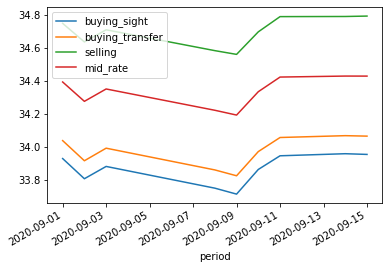

In [22]:
df.plot()